# 0. Setup Kaggle data

In [ ]:
# Refer to https://www.youtube.com/watch?v=57N1g8k2Hwc for setup
# Install kaggle
!pip install -q kaggle

In [ ]:
# upload API json file (CAUTION! sensitive data)
from google.colab import files
files.upload()

In [ ]:
# create the kaggle folder and cp json file into it
!mkdir -p ~/.kaggle
!cp *json ~/.kaggle
!ls ~/.kaggle

kaggle.json


In [ ]:
# change file permission
!chmod 600 ~/.kaggle/*json

In [ ]:
# download HM dataset
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [03:36<00:00, 192MB/s]
100% 28.7G/28.7G [03:36<00:00, 143MB/s]


In [ ]:
!mkdir -p hm_data
!unzip *zip -d hm_data

Streaming output truncated to the last 5000 lines.
  inflating: hm_data/images/089/0890677001.jpg  
  inflating: hm_data/images/089/0890677002.jpg  
  inflating: hm_data/images/089/0890677004.jpg  
  inflating: hm_data/images/089/0890683001.jpg  
  inflating: hm_data/images/089/0890683002.jpg  
  inflating: hm_data/images/089/0890684001.jpg  
  inflating: hm_data/images/089/0890684002.jpg  
  inflating: hm_data/images/089/0890686002.jpg  
  inflating: hm_data/images/089/0890697001.jpg  
  inflating: hm_data/images/089/0890697002.jpg  
  inflating: hm_data/images/089/0890700001.jpg  
  inflating: hm_data/images/089/0890717001.jpg  
  inflating: hm_data/images/089/0890717002.jpg  
  inflating: hm_data/images/089/0890717003.jpg  
  inflating: hm_data/images/089/0890722001.jpg  
  inflating: hm_data/images/089/0890722002.jpg  
  inflating: hm_data/images/089/0890734001.jpg  
  inflating: hm_data/images/089/0890734003.jpg  
  inflating: hm_data/images/089/0890741001.jpg  
  inflating: hm_da

In [ ]:
# remove kaggle API credentials
!rm ~/.kaggle/*json

In [ ]:
!rm *zip

In [ ]:
!ls

h-and-m-personalized-fashion-recommendations.zip  kaggle.json
hm_data						  sample_data


In [ ]:
import gc

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from PIL import Image

In [ ]:
articles_df = pd.read_csv('/content/hm_data/articles.csv')
customers_df = pd.read_csv('/content/hm_data/customers.csv')
transactions_df = pd.read_csv('/content/hm_data/transactions_train.csv')

In [ ]:
print(articles_df.shape)
display(articles_df.head())

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
print(customers_df.shape)
display(customers_df.head())

(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
print(transactions_df.shape)
display(transactions_df.head())

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


**Article EDA**

In [ ]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
articles_df.shape

(105542, 25)

In [ ]:
articles_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
articles_df.nunique() # unique items in each column start with columns with less unique values

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

index_group_name **column** Which index_group_name is the largest in inventory? 

> Indented block



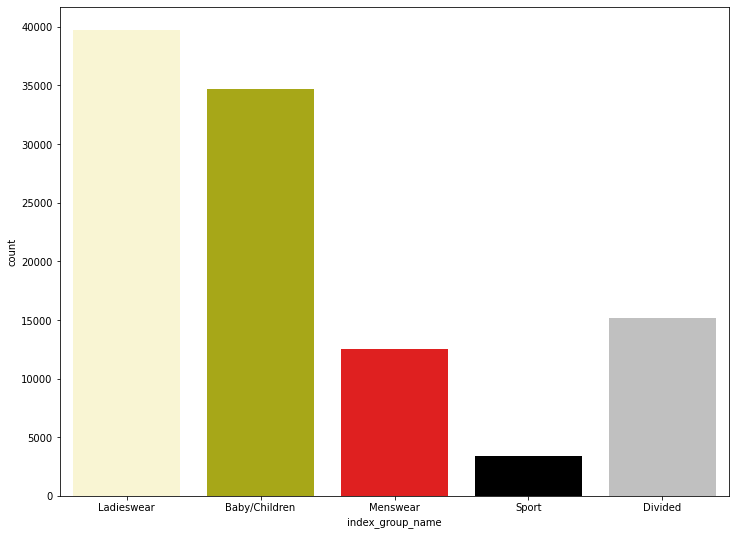

In [ ]:
fig = plt.figure(figsize=(12,9))
color = ["lemonchiffon", "y", "red", "black", "#C0C0C0", "Grey"]
sns.set_palette(color)
sns.countplot(data=articles_df, x='index_group_name')
plt.show()

Top 20 Products in Inventory 

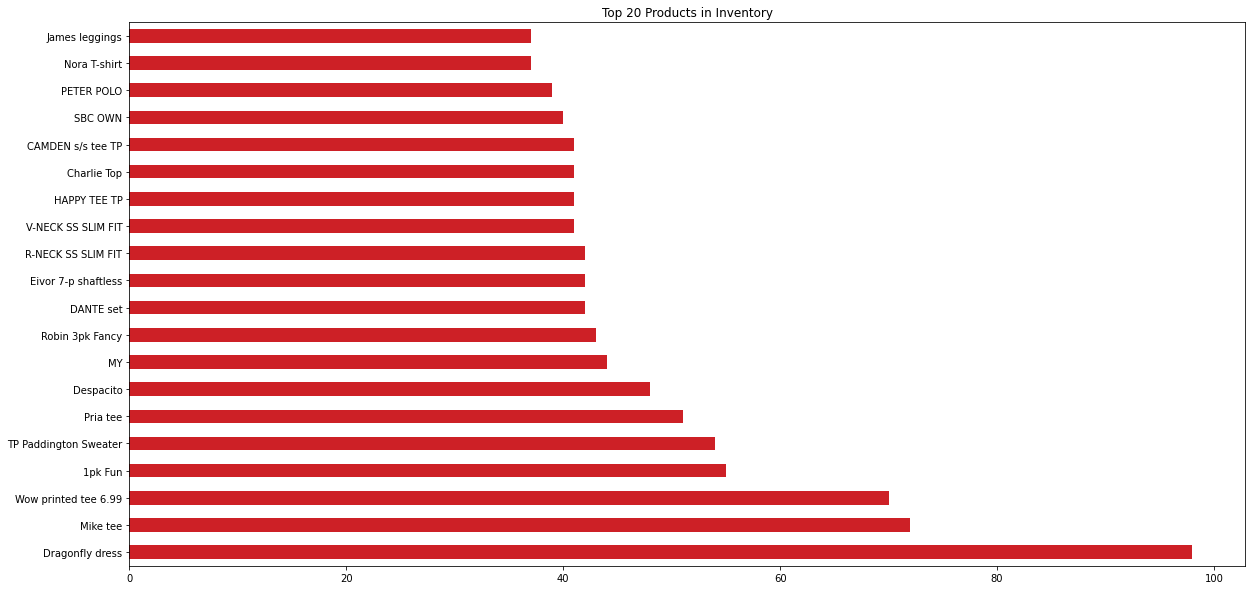

In [ ]:
fig = plt.figure(figsize=(20, 10))
articles_df['prod_name'].value_counts(ascending=False)[:20].plot(kind='barh', color='#CD2026')
plt.title('Top 20 Products in Inventory')
plt.show()

In [ ]:
print(customers_df.shape)
display(customers_df.head())

(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


What’s the average age of a customer? 36.39

In [ ]:
customers_df.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


How is age distributed?

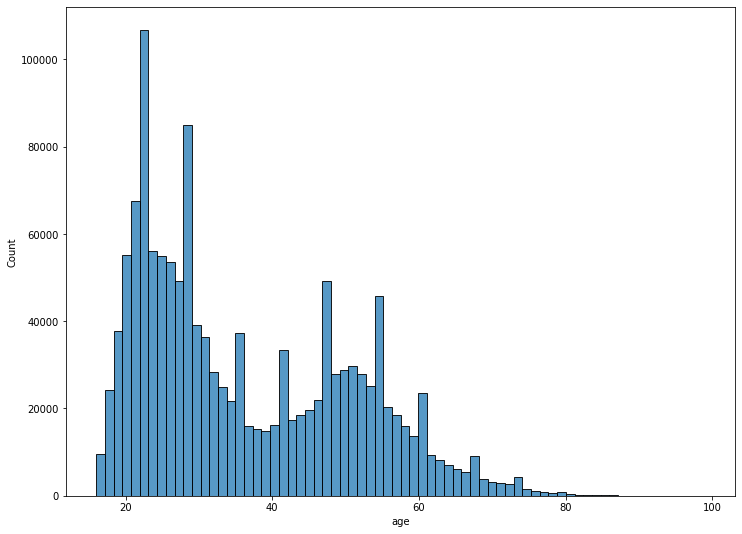

In [ ]:
fig = plt.figure(figsize=(12, 9))
sns.histplot(customers_df, x='age', bins=70)
plt.show()

What is the most common club_member_status?


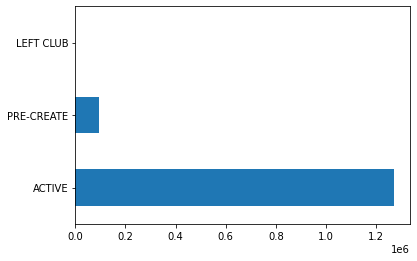

In [ ]:
customers_df['club_member_status'].value_counts().plot(kind='barh')
plt.show()

What is the most common fashion_news_frequency type?

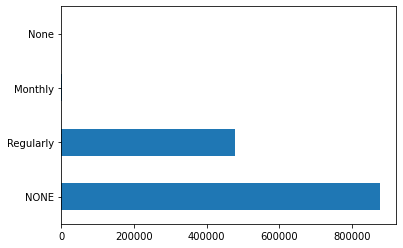

In [ ]:
customers_df['fashion_news_frequency'].value_counts().plot(kind='barh')
plt.show()

How does club_member_status compare to fashion_news_frequency?


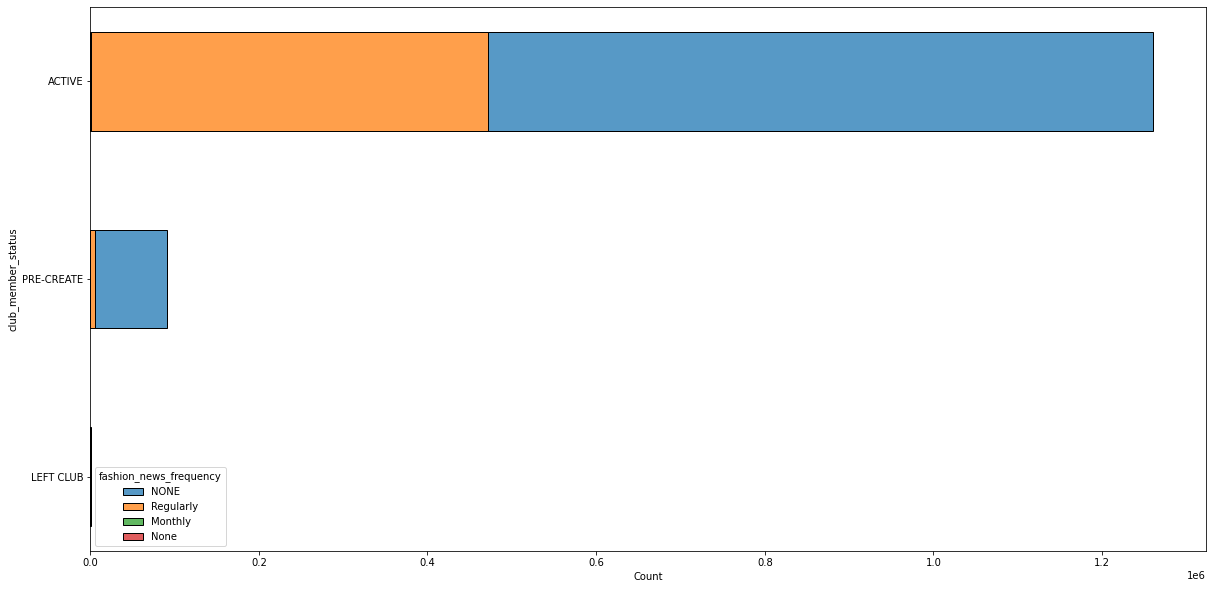

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(data=customers_df, y='club_member_status', hue='fashion_news_frequency', multiple='stack', shrink=.5)
fig.show()

How does age compare to fashion_news_frequency?


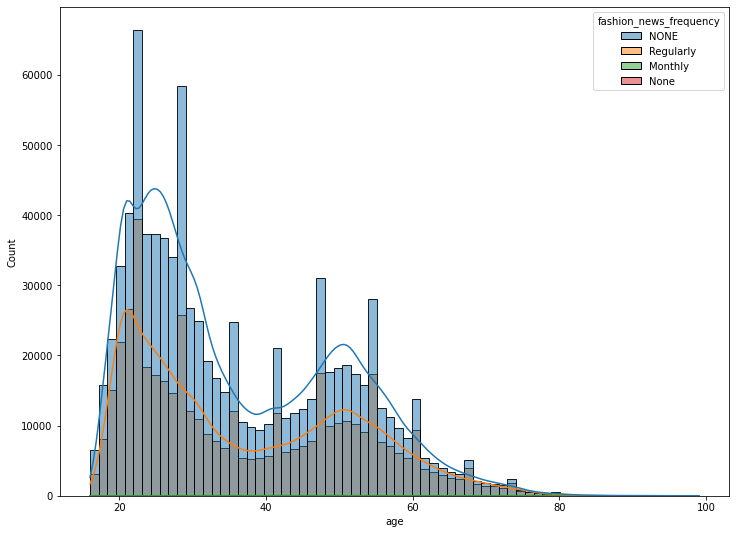

In [ ]:
fig = plt.figure(figsize=(12, 9))
sns.histplot(customers_df, x='age', bins=70, kde=True, hue='fashion_news_frequency')
plt.show()

Where do our customers live?

In [ ]:
customers_df['postal_code'].value_counts(ascending=False)

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: postal_code, Length: 352899, dtype: int64

In [ ]:
display(articles_df.head())

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Which index_name/index_group_name/garment_group_name/product_group_name is the largest in inventory? 

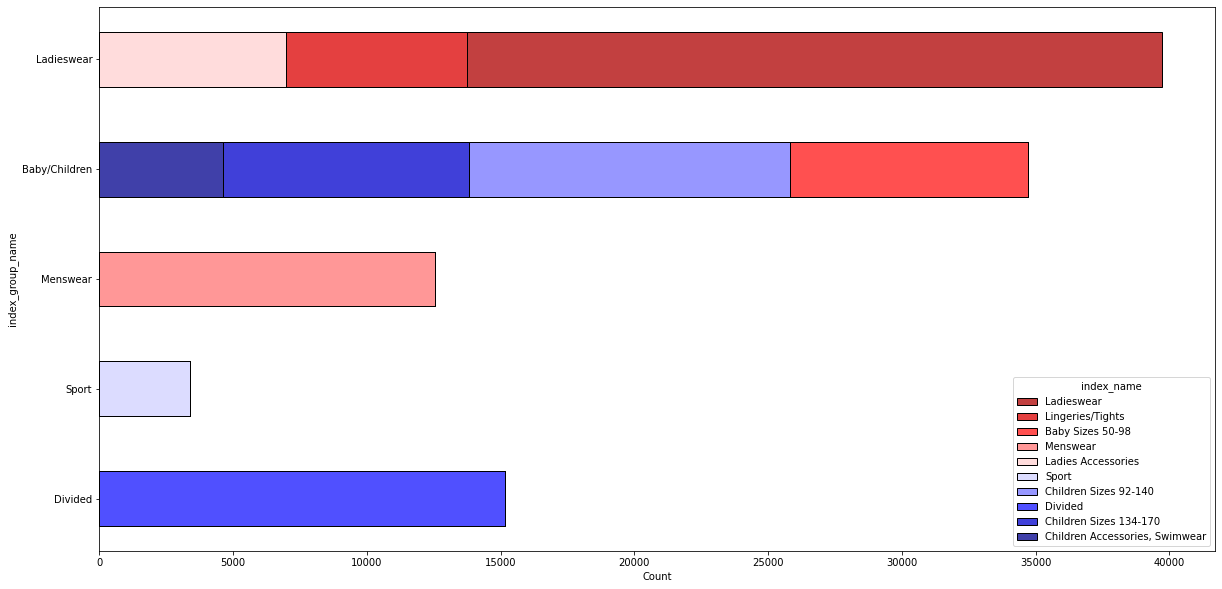

In [ ]:
fig = plt.figure (figsize=(20, 10))
sns.histplot(data=articles_df, y ='index_group_name', hue ='index_name', multiple= 'stack', shrink=.5, palette = 'seismic_r')
fig.show()

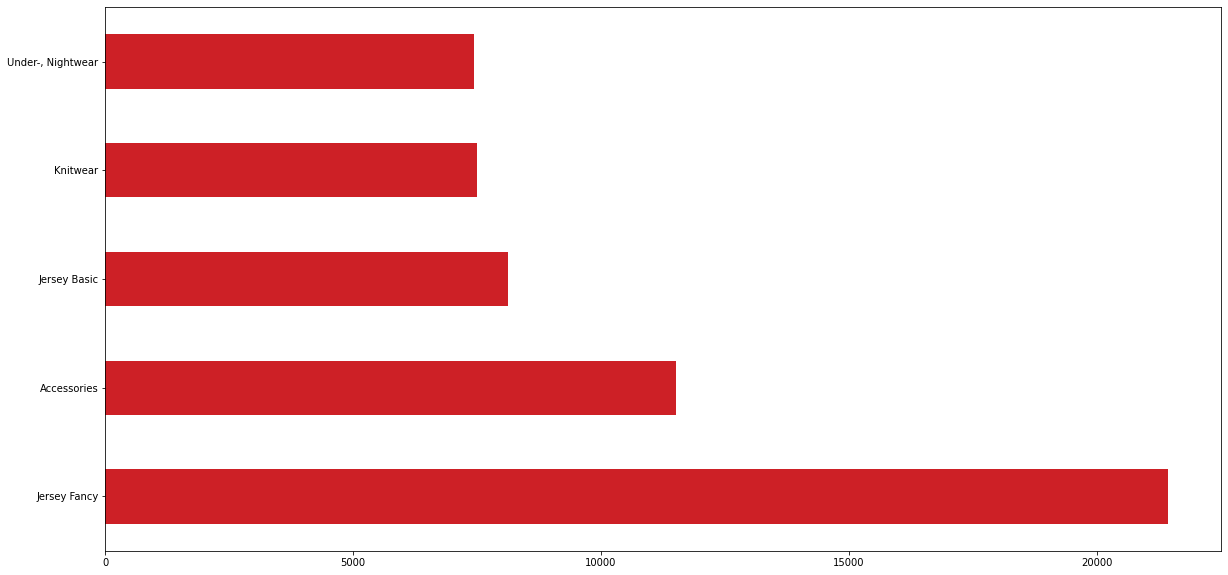

In [ ]:
fig = plt.figure(figsize=(20, 10))
articles_df['garment_group_name'].value_counts(ascending=False)[:5].plot(kind='barh', color='#CD2026')
plt.show()

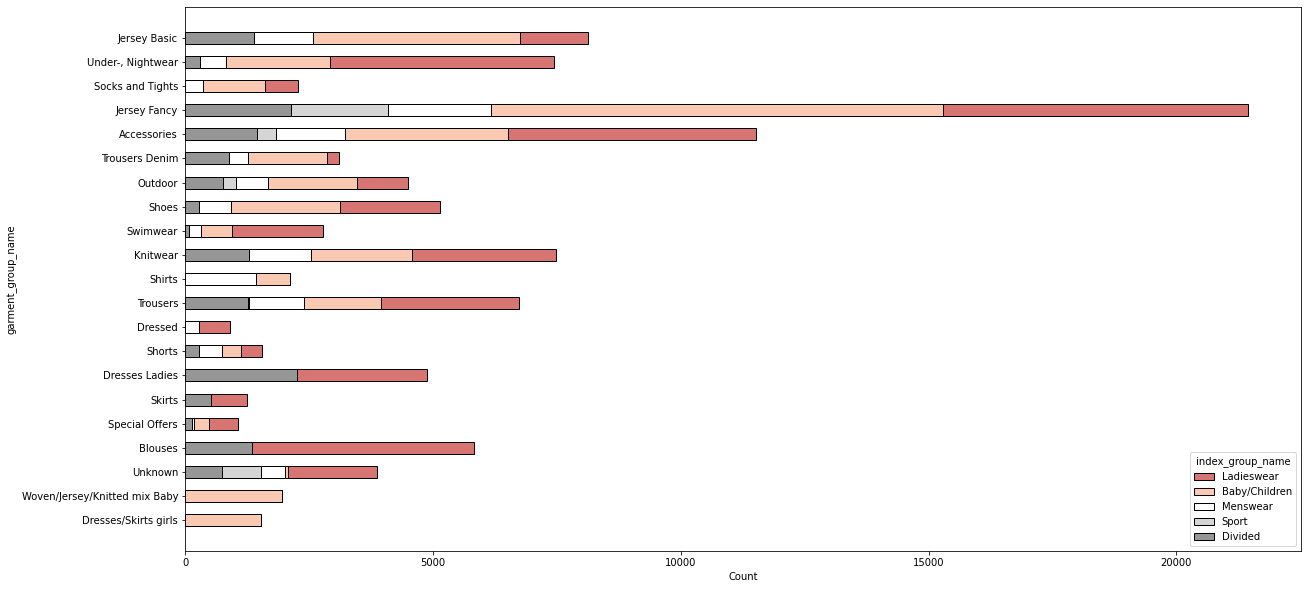

In [ ]:
fig = plt.figure (figsize=(20, 10))
sns.histplot(data=articles_df, y ='garment_group_name', hue ='index_group_name', multiple= 'stack', shrink=.5, palette = 'RdGy')
fig.show()

Which color_group_name/graphical_appearance_name/perceived_colour_value_name is the largest in inventory? 

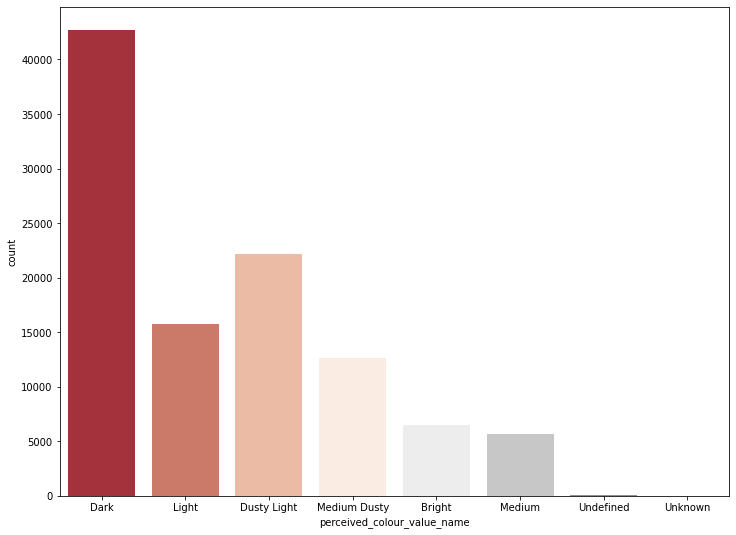

In [ ]:
fig = plt.figure(figsize=(12,9))
sns.countplot(data=articles_df, x='perceived_colour_value_name',palette = 'RdGy')
plt.show()

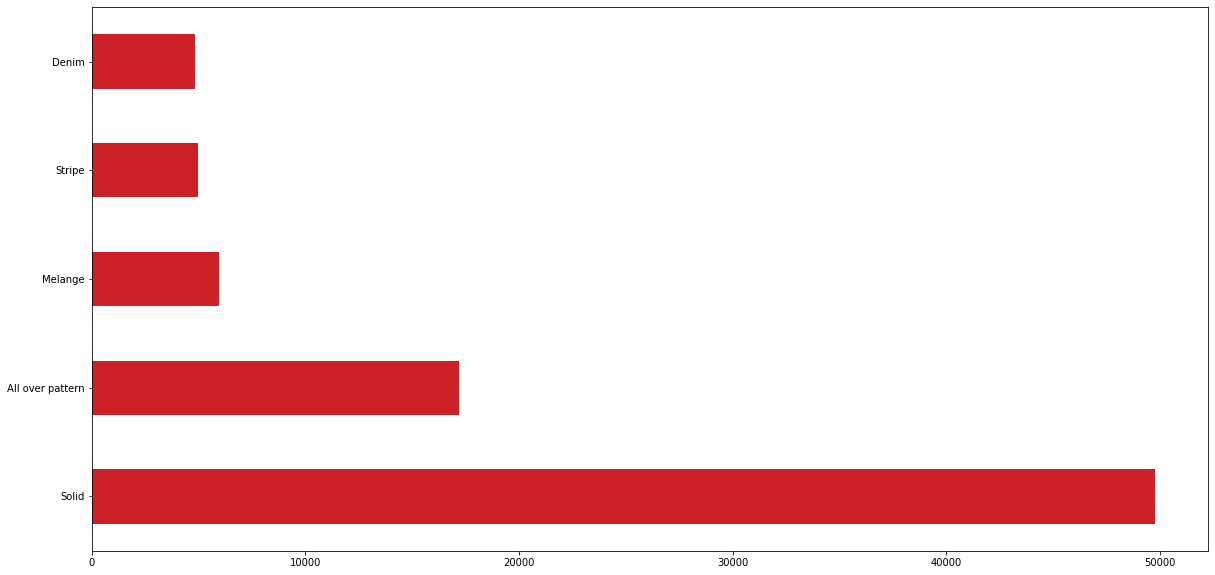

In [ ]:
fig = plt.figure(figsize=(20, 10))
articles_df['graphical_appearance_name'].value_counts(ascending=False)[:5].plot(kind='barh', color='#CD2026')
plt.show()

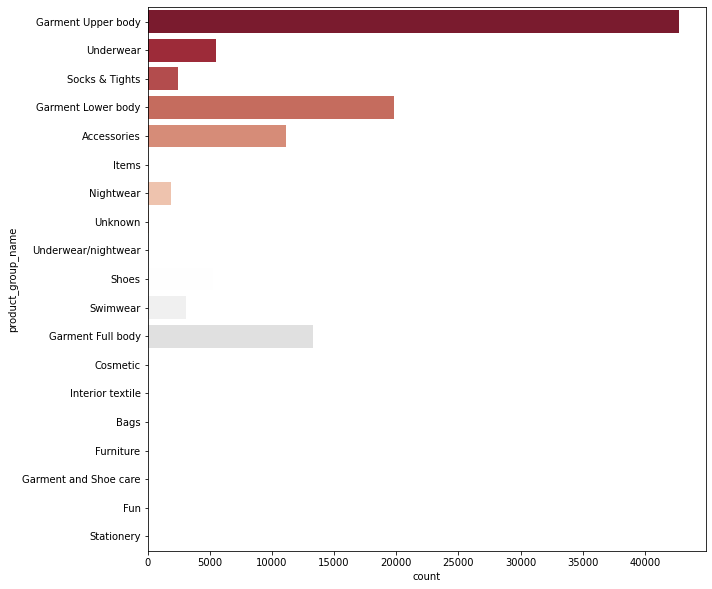

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(data=articles_df, y='product_group_name', palette = 'RdGy')
fig.show()

Top 10 prod_name in inventory?

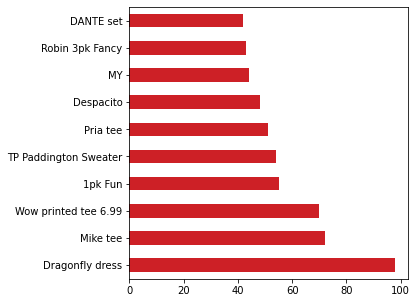

In [ ]:
fig = plt.figure(figsize=(5, 5))
articles_df['prod_name'].value_counts(ascending=False)[:10].plot(kind='barh', color='#CD2026')
plt.show()

Which sales_channel_id yields higher sales? 


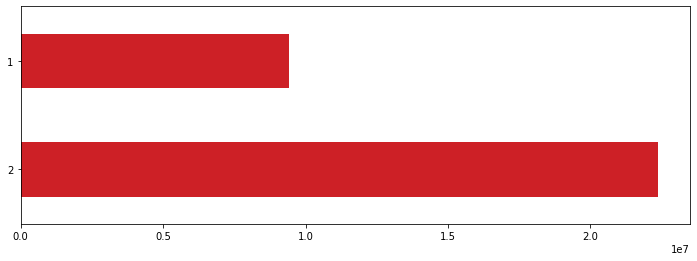

In [ ]:
fig = plt.figure(figsize=(12, 4))
transactions_df['sales_channel_id'].value_counts().plot(kind='barh', color='#CD2026')
plt.show()